In [8]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Function to Predict

In [9]:
insurance = Table.read_table('insurance_charges.csv')
insurance

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


In [10]:
insurance.select('bmi').where('bmi', are.above(25))

bmi
27.9
33.77
33
28.88
25.74
33.44
27.74
29.83
25.84
26.22


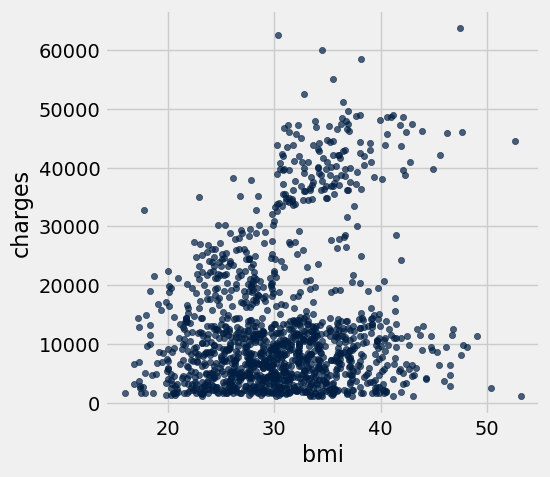

In [3]:
insurance.scatter('bmi', 'charges')

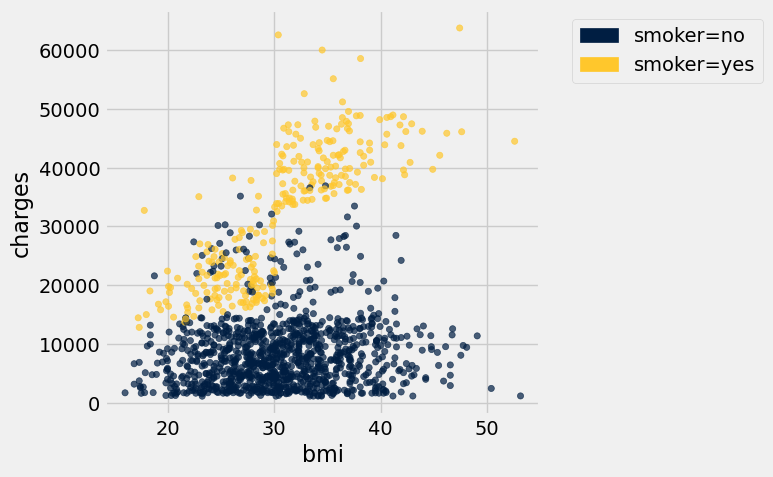

In [4]:
insurance.scatter('bmi', 'charges', group = 'smoker')

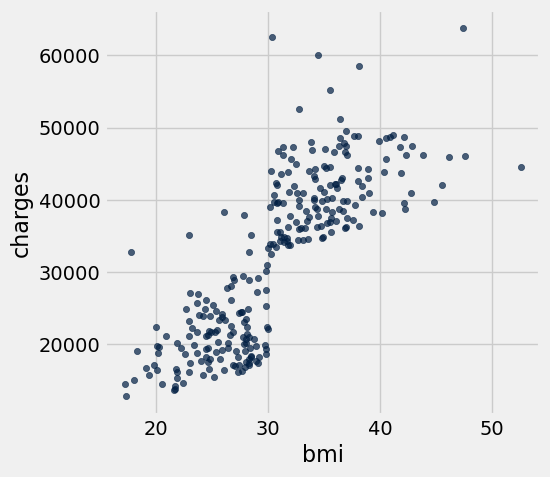

In [5]:
insurance_smoker = insurance.where('smoker', 'yes')
insurance_smoker.scatter('bmi', 'charges')

### For a patient with a BMI of 35, how much will the charges be?

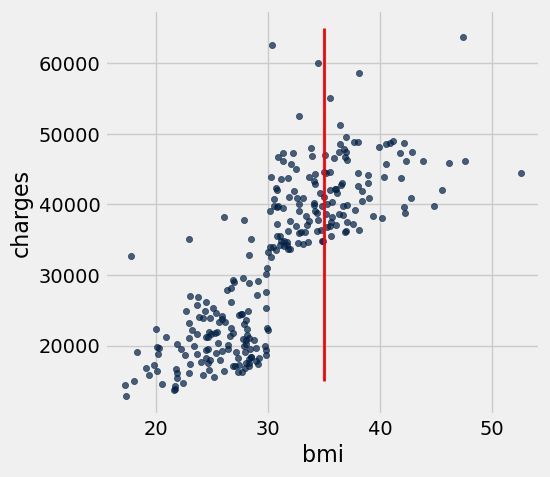

In [35]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([35, 35], [15000, 65000], color='red', lw=2);

In [7]:
insurance_smoker.where('bmi', are.equal_to(35))

age,sex,bmi,children,smoker,region,charges


### Can we use all BMIs *close* to 35? 

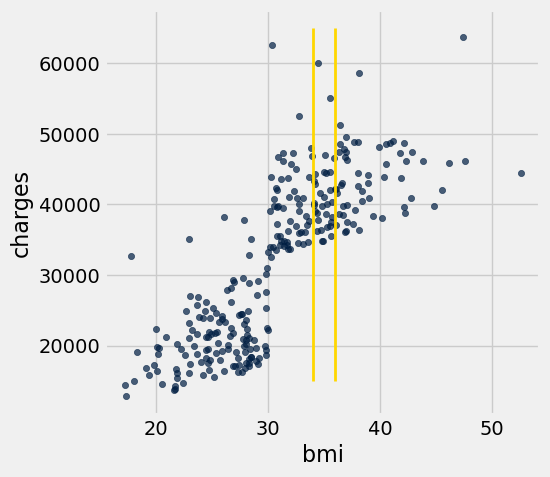

In [8]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([34, 34], [15000, 65000], color='gold', lw=2);
plots.plot([36, 36], [15000, 65000], color='gold', lw=2);

In [9]:
nearby = insurance_smoker.where('bmi', are.between(34, 36))
nearby_mean = np.mean(nearby.column('charges'))
nearby_mean

41303.623821250003

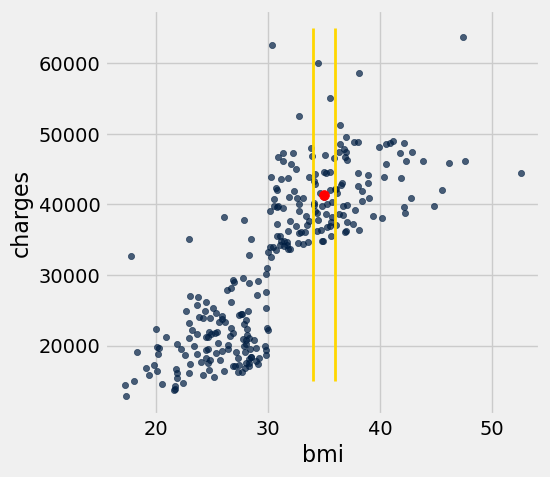

In [10]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([34, 34], [15000, 65000], color='gold', lw=2);
plots.plot([36, 36], [15000, 65000], color='gold', lw=2);
plots.scatter(35, nearby_mean, color='red', s=50);

### Can we write a function to do this for all BMIs in the data? 

In [15]:
def predict(bmi):
    nearby = insurance_smoker.where('bmi', are.between(bmi -1 , bmi + 1))
    return np.mean(nearby.column('charges'))

In [12]:
predict(35)

41303.623821250003

In [13]:
predict(23)

21921.677067777779

In [14]:
predict(27)

22854.848840666662

In [16]:
predicted_charges = insurance_smoker.apply(predict, 'bmi')
predicted_charges

array([ 21938.98684917,  22670.53803731,  44621.29085   ,  41143.17644759,
        39364.1627731 ,  42329.12499219,  41634.38642333,  42586.35475833,
        42516.8842976 ,  43434.4769    ,  41228.65593375,  21832.19430595,
        41094.48070429,  42743.02066833,  39349.87613806,  22172.17900118,
        19470.89362895,  21248.3506288 ,  21049.63755074,  43054.20305182,
        41494.05093063,  22172.17900118,  39238.54970853,  31190.65710967,
        39742.72837065,  18253.79788   ,  18421.50333333,  32400.54788194,
        21832.19430595,  41207.67643176,  21879.00598027,  39810.73989031,
        22114.16369784,  18809.82498   ,  21828.71142207,  22230.09195219,
        35513.04538686,  21986.070331  ,  21219.13462111,  21615.139505  ,
        41634.38642333,  22452.9474568 ,  42897.2641776 ,  43470.35314947,
        44755.80916111,  42420.58602429,  22111.72613868,  41494.05093063,
        21259.31190414,  19443.45736944,  23177.98754733,  42516.8842976 ,
        22111.72613868,  

In [17]:
insurance_smoker = insurance_smoker.with_column(
    'Predicted charges', predicted_charges)

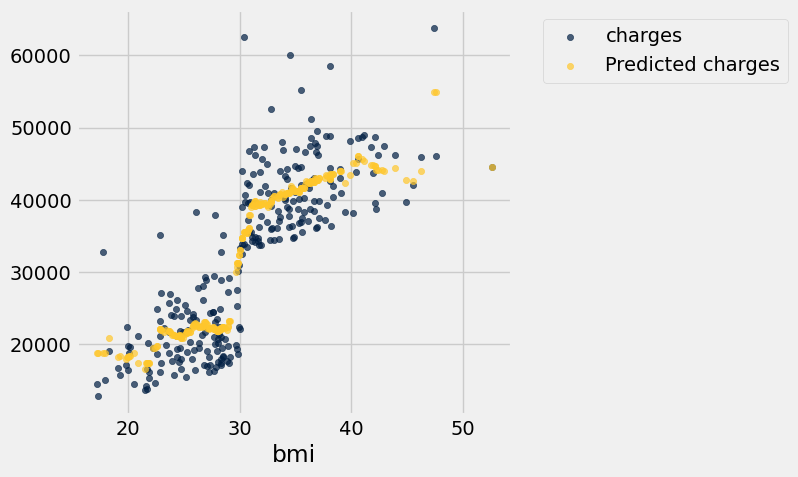

In [18]:
insurance_smoker.select(
    'charges', 
    'bmi', 
    'Predicted charges'
).scatter('bmi')

## Grouping by One Column ##

In [19]:
cereal = Table.read_table('Cereal.csv')
cereal

Name,Company,Serving,Calories,Fat,Sodium,Carbs,Fiber,Sugars,Protein
Boo Berry,General Mills,1,118,0.8,211,27,0.1,14,1
Crunchy Bran,Quaker,0.75,120,1.3,309,31,6.4,8,1.3
King Vitaman,Quaker,1.5,80,0.7,173,17,0.9,4,1.3
Crispix,Kellogs,1,113,0.3,229,26,0.1,3,2
Cocoa Blasts,Quaker,1,130,1.2,135,29,0.8,16,1
Cinnamon Toast Crunch,General Mills,0.75,169,4.4,408,32,1.7,13.3,2.7
Corn Pops,Kellogs,1,117,0.2,120,28,0.3,15,1
Kix,General Mills,1.3,87,0.5,205,20,0.8,2.3,1.5
Special K,Kellogs,1,117,0.4,224,22,0.8,4,7
Rice Krispie Treats,Kellogs,0.75,160,1.7,252,35,0,12,1.3


In [20]:
cereal.group('Company')

Company,count
General Mills,3
Kellogs,4
Quaker,3


In [21]:
cereal.select('Company', 'Calories').group('Company', np.average)

Company,Calories average
General Mills,124.667
Kellogs,126.75
Quaker,110


In [22]:
cereal.drop('Serving', 'Name').group('Company', np.average)

Company,Calories average,Fat average,Sodium average,Carbs average,Fiber average,Sugars average,Protein average
General Mills,124.667,1.9,274.667,26.3333,0.866667,9.86667,1.73333
Kellogs,126.75,0.65,206.25,27.75,0.3,8.5,2.825
Quaker,110,1.06667,205.667,25.6667,2.7,9.33333,1.2


In [23]:
cereal.drop('Serving').group('Company', np.average)

Company,Name average,Calories average,Fat average,Sodium average,Carbs average,Fiber average,Sugars average,Protein average
General Mills,,124.667,1.9,274.667,26.3333,0.866667,9.86667,1.73333
Kellogs,,126.75,0.65,206.25,27.75,0.3,8.5,2.825
Quaker,,110,1.06667,205.667,25.6667,2.7,9.33333,1.2


In [24]:
cereal.select('Company', 'Fat').group('Company', max)

Company,Fat max
General Mills,4.4
Kellogs,1.7
Quaker,1.3


## Grouping By One Column ##

In [25]:
sleep = Table.read_table('SleepStudy.csv').select(
    'ClassYear',
    'LarkOwl',
    'GPA', 
    'PoorSleepQuality', 
    'AverageSleep', 
    'Drinks'
)

sleep

ClassYear,LarkOwl,GPA,PoorSleepQuality,AverageSleep,Drinks
4,Neither,3.6,4,7.18,10
4,Neither,3.24,6,6.93,6
4,Owl,2.97,18,5.02,3
1,Lark,3.76,9,6.9,2
4,Owl,3.2,9,6.35,4
4,Neither,3.5,6,9.04,0
2,Lark,3.35,2,7.52,6
2,Lark,3,10,9.01,3
1,Neither,4,5,8.54,3
4,Neither,2.9,2,6.68,6


In [26]:
sleep.group('ClassYear')

ClassYear,count
1,47
2,95
3,54
4,57


In [27]:
sleep.group('ClassYear', np.average)

ClassYear,LarkOwl average,GPA average,PoorSleepQuality average,AverageSleep average,Drinks average
1,,3.52787,6.51064,7.92532,4.48936
2,,3.12758,6.04211,8.03368,6.10526
3,,3.21389,6.5,7.89889,5.48148
4,,3.23158,6.17544,7.95,5.64912


In [28]:
by_Drinks = sleep.group('Drinks', np.average)
by_Drinks.show()

Drinks,ClassYear average,LarkOwl average,GPA average,PoorSleepQuality average,AverageSleep average
0,2.12121,,3.31606,6.06061,7.90485
1,2.55556,,3.42778,6.77778,7.77778
2,2.3125,,3.3975,5.5,7.99313
3,2.66667,,3.35167,6.86667,8.17267
4,2.61111,,3.33833,6.77778,8.01611
5,2.48387,,3.15613,6.48387,7.8029
6,2.78261,,3.27826,5.34783,7.75
7,2.59091,,3.17818,5.90909,8.53227
8,2.5,,3.37286,6.64286,7.92929
9,2.09091,,3.30545,6.72727,7.89091


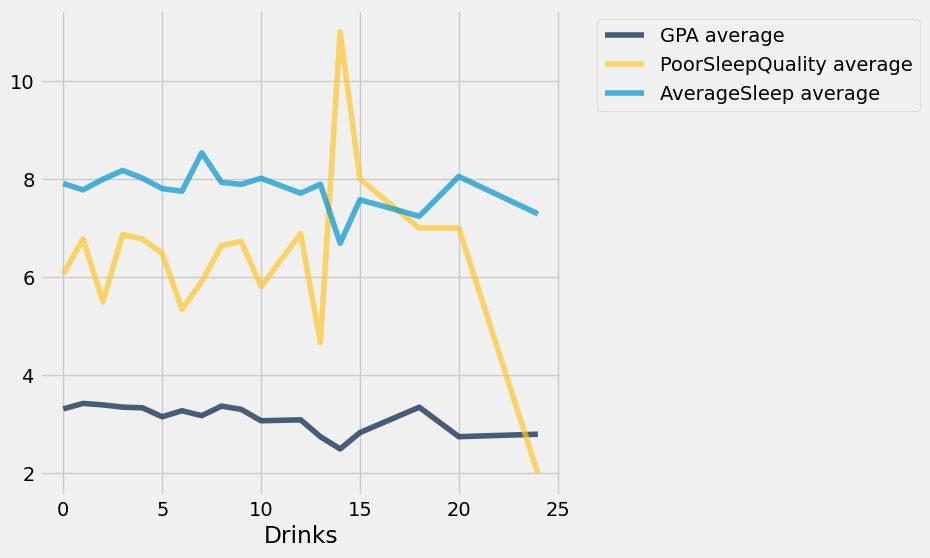

In [29]:
# Drop the 'ClassYear average' and LarkOwl average' columns

by_Drinks.drop(1,2).plot('Drinks')

## Grouping by Two Columns ##

In [30]:
sleep.group(['ClassYear','LarkOwl']).show()

ClassYear,LarkOwl,count
1,Lark,6
1,Neither,33
1,Owl,8
2,Lark,18
2,Neither,54
2,Owl,23
3,Lark,9
3,Neither,35
3,Owl,10
4,Lark,8


In [31]:
sleep.group(['ClassYear','LarkOwl'], np.average).show()

ClassYear,LarkOwl,GPA average,PoorSleepQuality average,AverageSleep average,Drinks average
1,Lark,3.31333,8.16667,7.92333,3
1,Neither,3.5403,6.36364,7.9703,4.15152
1,Owl,3.6375,5.875,7.74125,7
2,Lark,3.33833,5.72222,8.03389,5.72222
2,Neither,3.0987,5.44444,7.97685,6.05556
2,Owl,3.03043,7.69565,8.16696,6.52174
3,Lark,3.29778,5.55556,7.59556,4.88889
3,Neither,3.204,6.31429,7.992,5.57143
3,Owl,3.173,8,7.846,5.7
4,Lark,3.365,4,8.16625,2.875


## Pivot Tables

In [32]:
sleep.pivot('ClassYear', 'LarkOwl')

LarkOwl,1,2,3,4
Lark,6,18,9,8
Neither,33,54,35,41
Owl,8,23,10,8


In [33]:
sleep.pivot('ClassYear', 'LarkOwl', values='Drinks', collect=np.average)

LarkOwl,1,2,3,4
Lark,3,5.72222,4.88889,2.875
Neither,4.15152,6.05556,5.57143,6.07317
Owl,7,6.52174,5.7,6.25
